<a href="https://colab.research.google.com/github/ZEVs-top/Test-RANHIGS/blob/main/%D0%94%D0%97_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Домашнее задание №10_Корреляция и корреляционный анализ**

##**Задание 1**

In [ ]:
import pandas as pd
import gdown

In [ ]:
def load_data(file_path):
    return pd.read_csv(file_path)

In [ ]:
# Задание 1 — загрузка данных и анализ возраста

file_id = '11RxLvpHyFw8yC4yZfIsMSHWixkJ_XFpM'
#https://drive.google.com/file/d/11RxLvpHyFw8yC4yZfIsMSHWixkJ_XFpM/view?usp=sharing

# Скачиваем файлы
file_path = 'water.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id}', file_path, quiet=False)

data = load_data(file_path)
#data = analyze_age(data)

Downloading...
From: https://drive.google.com/uc?id=11RxLvpHyFw8yC4yZfIsMSHWixkJ_XFpM
To: /content/water.csv
100%|██████████| 2.00k/2.00k [00:00<00:00, 5.40MB/s]


In [ ]:
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


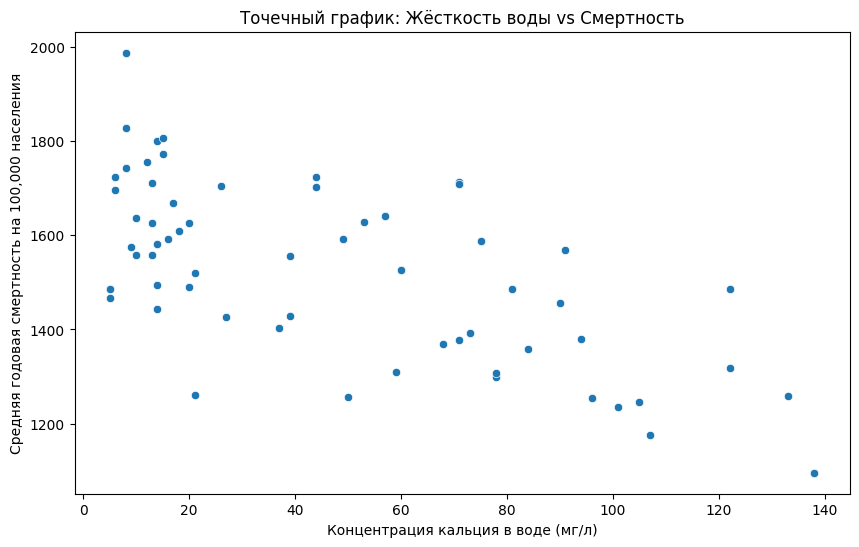

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['hardness'], y=data['mortality'])
plt.title('Точечный график: Жёсткость воды vs Смертность')
plt.xlabel('Концентрация кальция в воде (мг/л)')
plt.ylabel('Средняя годовая смертность на 100,000 населения')
plt.show()

In [ ]:
pearson_corr, _ = pearsonr(data['hardness'], data['mortality'])
spearman_corr, _ = spearmanr(data['hardness'], data['mortality'])

print(f"Коэффициент корреляции Пирсона: {pearson_corr:.3f}")
print(f"Коэффициент корреляции Спирмена: {spearman_corr:.3f}")

Коэффициент корреляции Пирсона: -0.655
Коэффициент корреляции Спирмена: -0.632


In [ ]:
X = data[['hardness']].values.reshape(-1, 1)
y = data['mortality']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2 = model.score(X, y)
print(f"Коэффициент детерминации (R^2): {r2:.3f}")

Коэффициент детерминации (R^2): 0.429


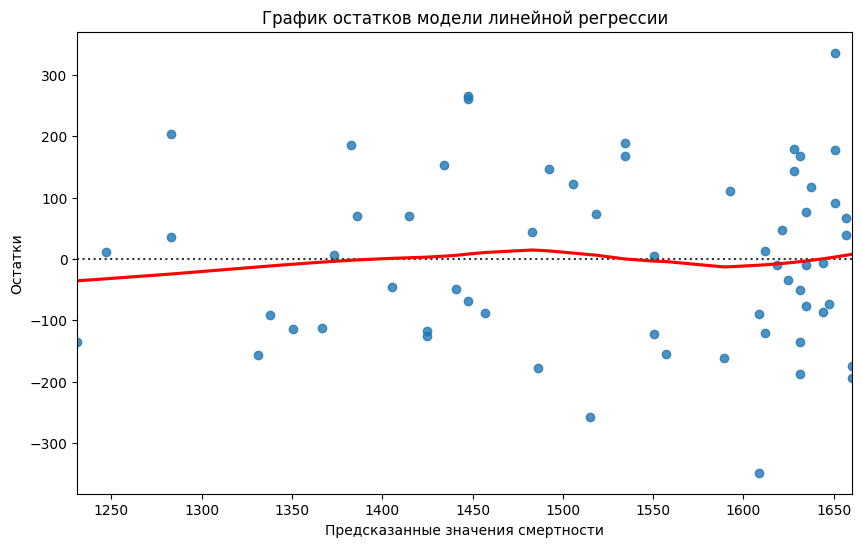

In [ ]:
residuals = y - y_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('График остатков модели линейной регрессии')
plt.xlabel('Предсказанные значения смертности')
plt.ylabel('Остатки')
plt.show()

Существует умеренная обратная связь между жёсткостью воды и средней годовой смертностью. Это подтверждается отрицательными коэффициентами корреляции Пирсона (-0.655) и Спирмена (-0.632), которые указывают на обратную зависимость: по мере увеличения одного показателя другой имеет тенденцию уменьшаться. Однако коэффициент детерминации (R^2) равен 0.429, что означает, что около 42.9% изменчивости в среднем уровне смертности можно объяснить жёсткостью воды. Это свидетельствует о наличии связи, но также указывает на влияние других факторов. На первом графике видно, что существует тенденция к снижению средней годовой смертности с увеличением концентрации кальция в воде. Это согласуется с результатами корреляционного анализа, который указывает на обратную зависимость между жёсткостью воды и смертностью. Видно, что точки распределены с определённой отрицательной корреляцией, что подтверждает наличие обратной связи: по мере увеличения жёсткости воды смертность имеет тенденцию снижаться. Однако, стоит учитывать, что корреляция не всегда означает причинно-следственную связь. На смертность могут влиять и другие факторы, которые не учтены в данном анализе.

In [ ]:
#**Задание 2**

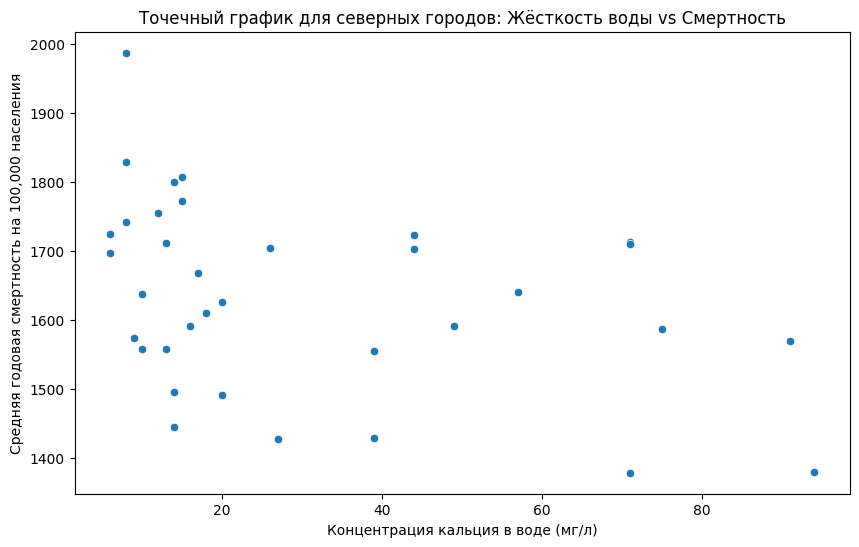

In [ ]:
north_data = data[data['location'] == 'North']
south_data = data[data['location'] == 'South']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=north_data['hardness'], y=north_data['mortality'])
plt.title('Точечный график для северных городов: Жёсткость воды vs Смертность')
plt.xlabel('Концентрация кальция в воде (мг/л)')
plt.ylabel('Средняя годовая смертность на 100,000 населения')
plt.show()

In [ ]:
pearson_corr_north, _ = pearsonr(north_data['hardness'], north_data['mortality'])
spearman_corr_north, _ = spearmanr(north_data['hardness'], north_data['mortality'])

print(f"Коэффициент корреляции Пирсона для северных городов: {pearson_corr_north:.3f}")
print(f"Коэффициент корреляции Спирмена для северных городов: {spearman_corr_north:.3f}")

X_north = north_data[['hardness']].values.reshape(-1, 1)
y_north = north_data['mortality']
model_north = LinearRegression()
model_north.fit(X_north, y_north)
y_pred_north = model_north.predict(X_north)

r2_north = model_north.score(X_north, y_north)
print(f"Коэффициент детерминации (R^2) для северных городов: {r2_north:.3f}")

Коэффициент корреляции Пирсона для северных городов: -0.369
Коэффициент корреляции Спирмена для северных городов: -0.404
Коэффициент детерминации (R^2) для северных городов: 0.136


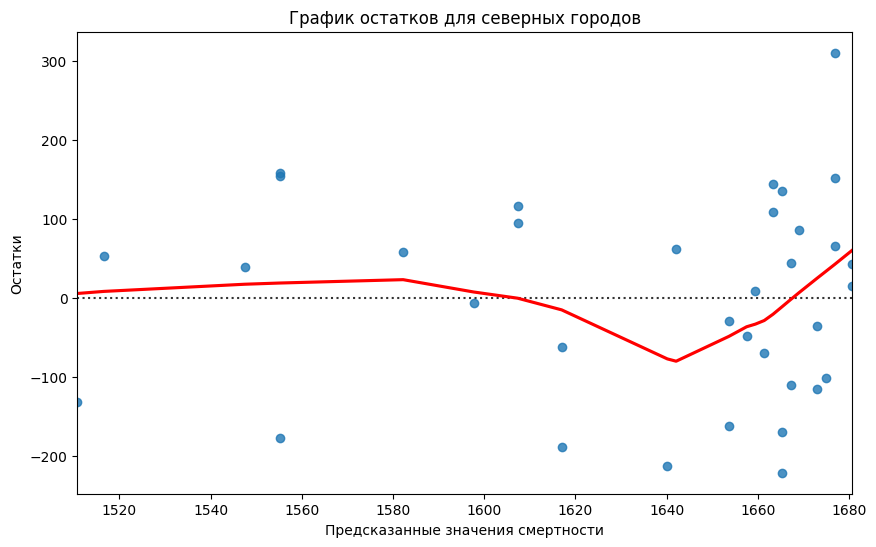

In [ ]:
residuals_north = y_north - y_pred_north
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_north, y=residuals_north, lowess=True, line_kws={'color': 'red'})
plt.title('График остатков для северных городов')
plt.xlabel('Предсказанные значения смертности')
plt.ylabel('Остатки')
plt.show()

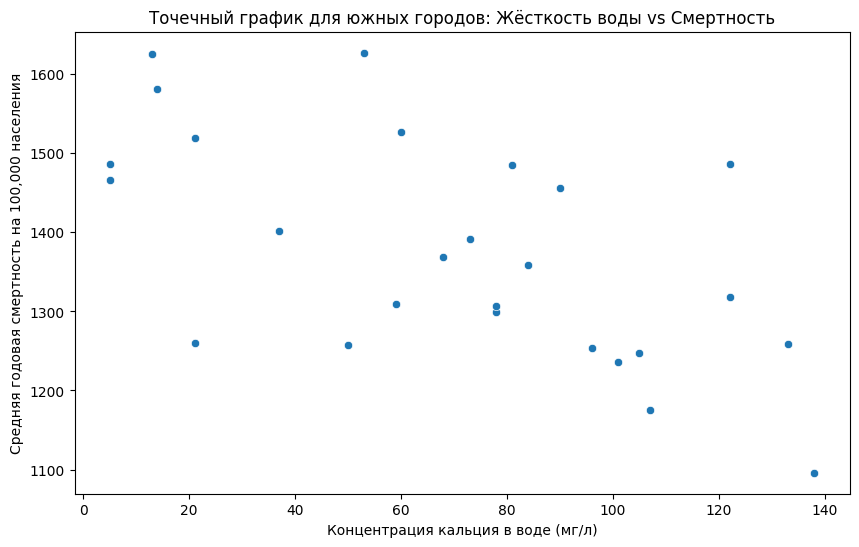

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=south_data['hardness'], y=south_data['mortality'])
plt.title('Точечный график для южных городов: Жёсткость воды vs Смертность')
plt.xlabel('Концентрация кальция в воде (мг/л)')
plt.ylabel('Средняя годовая смертность на 100,000 населения')
plt.show()

In [ ]:
pearson_corr_south, _ = pearsonr(south_data['hardness'], south_data['mortality'])
spearman_corr_south, _ = spearmanr(south_data['hardness'], south_data['mortality'])

print(f"Коэффициент корреляции Пирсона для южных городов: {pearson_corr_south:.3f}")
print(f"Коэффициент корреляции Спирмена для южных городов: {spearman_corr_south:.3f}")

X_south = south_data[['hardness']].values.reshape(-1, 1)
y_south = south_data['mortality']
model_south = LinearRegression()
model_south.fit(X_south, y_south)
y_pred_south = model_south.predict(X_south)

r2_south = model_south.score(X_south, y_south)
print(f"Коэффициент детерминации (R^2) для южных городов: {r2_south:.3f}")

Коэффициент корреляции Пирсона для южных городов: -0.602
Коэффициент корреляции Спирмена для южных городов: -0.596
Коэффициент детерминации (R^2) для южных городов: 0.363


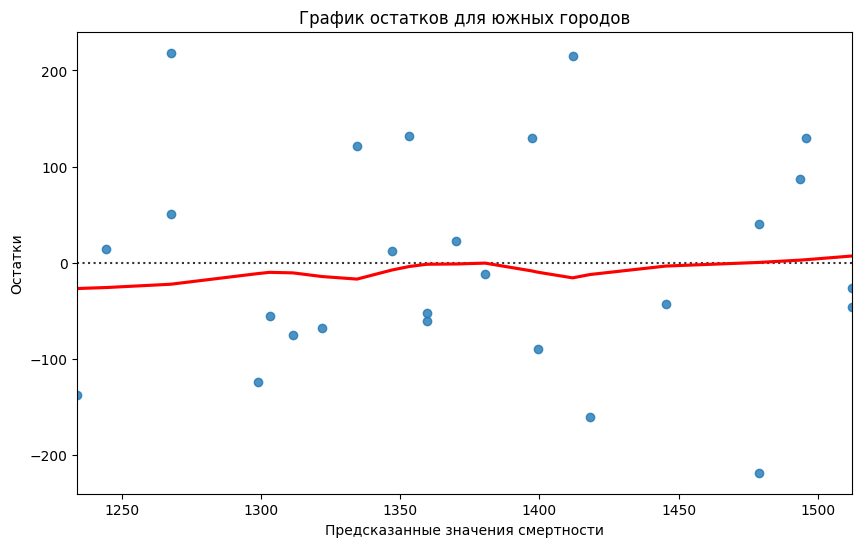

In [ ]:
residuals_south = y_south - y_pred_south
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_south, y=residuals_south, lowess=True, line_kws={'color': 'red'})
plt.title('График остатков для южных городов')
plt.xlabel('Предсказанные значения смертности')
plt.ylabel('Остатки')
plt.show()


Зависимость между жёсткостью воды и смертностью существует как для северных, так и для южных городов, однако эта зависимость значительно сильнее в южных городах. Для северных городов зависимость более слабая, и модель линейной регрессии объясняет меньшую часть вариации смертности.

Таким образом, зависимость сохраняется, но она более выражена для южных городов.